# Análise IV - Hora do Dia

In [7]:
import pandas as pd
import seaborn as sns
from scipy.stats import ranksums
gorjetas = pd.read_csv('arquivo/gorjetas.csv')
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [9]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

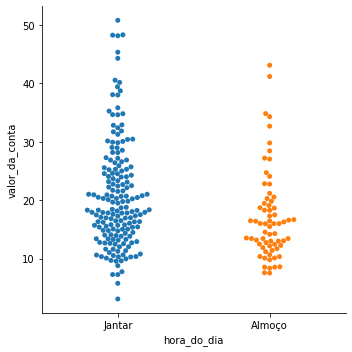

In [12]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

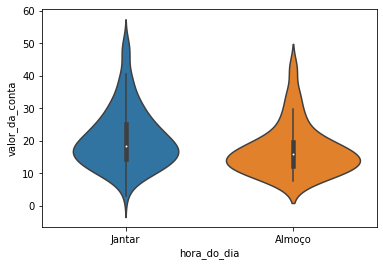

In [13]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

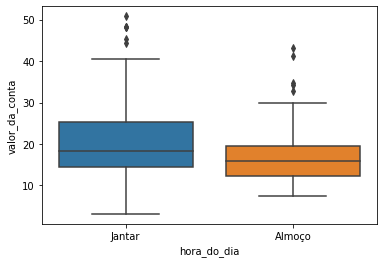

In [14]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [15]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

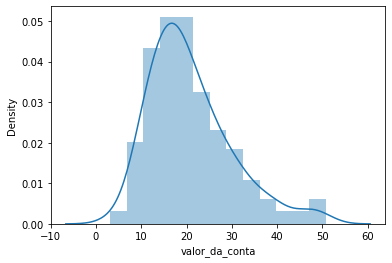

In [20]:
sns.distplot(jantar)

C:\Users\rgrso\anaconda3\envs\seguro\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta'>

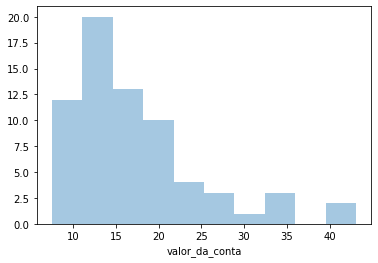

In [17]:
sns.distplot(almoco, kde=False)

In [18]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

C:\Users\rgrso\anaconda3\envs\seguro\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

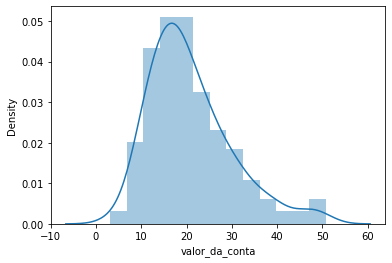

In [21]:
sns.distplot(jantar)

<AxesSubplot:xlabel='valor_da_conta'>

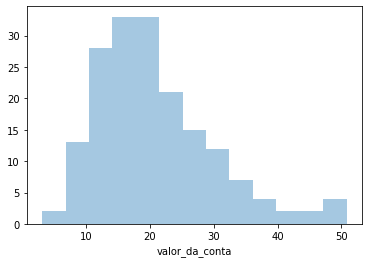

In [19]:
sns.distplot(jantar, kde=False)

C:\Users\rgrso\anaconda3\envs\seguro\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta'>

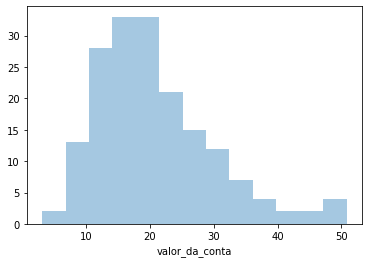

In [22]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta
sns.distplot(jantar, kde=False)

In [23]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.164128
Jantar,20.797159,3.102670,0.159518


### Teste de Hipótese 

H<sup>null</sup>
>**A distribuição do valor da conta é igual no jantar e no almoço**

H<sup>alt</sup>
>**A distribuição do valor da conta não é igual no jantar e no almoço**

In [24]:
r2 = ranksums(jantar, almoco)

In [25]:
print('O Valor do p.value é de {}'.format(r2.pvalue))

O Valor do p.value é de 0.0011791039723641672


H<sup>alt</sup>
>**A distribuição do valor da conta não é igual no jantar e no almoço**

In [26]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [27]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

### Teste de Hipótese II

H<sup>null</sup>
>**A distribuição da taxa da gorjete é igual no jantar e no almoço**

H<sup>alt</sup>
>**A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [30]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [29]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 0.23027859883366675


H<sup>null</sup>
>**A distribuição da taxa da gorjete é igual no jantar e no almoço**